# 01-assignment-data-preprocessing
First fetch the data, then drop the unwanted columns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
  
# fetch the dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
disease_df = chronic_kidney_disease.data.original
disease_df = disease_df.drop(columns=["rbc","pc","pcc","ba","sc","htn","dm","cad","appet","pe","ane"])
(disease_df.rename
 (columns={
    'bp':'blood pressure',
    'sg':'specific gravity',
    'al':'albumin',
    'su':'sugar',
    'bgr':'blood glucose random',
    'bu':'blood urea',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed cell volume',
    'wbcc': 'white blood cell count',
    'rbcc':'red blood cell count',
}
, inplace=True))
disease_df

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


___
Convert the original hemoglobin values from ``g/dl`` to ``g/l``.

In [2]:
disease_df['hemoglobin'] = disease_df['hemoglobin'] * 10 # multiply by 10
disease_df

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,113.0,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,96.0,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,notckd


___
Map the ``ckd`` values to be ``a``, and the ``notckd`` to be ``c``.

In [3]:
disease_df['class'] = disease_df['class'].map({'ckd': 'a'}).fillna('c')
disease_df

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,113.0,38.0,6000.0,NaN,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,96.0,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


___
Drop the unwanted rows with ``3`` or more ``null`` values.

In [4]:
print("Original row count: ", len(disease_df))

Original row count:  400


In [5]:
disease_df = disease_df[disease_df.isna().sum(axis=1) < 3]
disease_df

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


In [6]:
print("Row count after: ", len(disease_df))

Row count after:  265


___
Separate Dataframes to two: ``affected`` and ``not_affected``.

In [7]:
affected = disease_df[disease_df['class'] == 'a'].copy()
affected

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,134.0,47.0,11000.0,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,122.0,40.0,9800.0,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,86.0,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,126.0,37.0,10200.0,4.1,a


``139`` rows of affected individuals.

In [8]:
not_affected = disease_df[disease_df['class'] == 'c'].copy()
not_affected

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


### Drop the class columns for diagrams

In [9]:
not_affected.drop(columns='class', inplace=True)
affected.drop(columns='class', inplace=True)

``126`` rows of control individuals.
___

### Average statistics of ``not affected`` individuals

In [10]:
not_affected_avg = not_affected.select_dtypes(include="number").columns
for i in not_affected_avg:
    print(f"{i}: {round(not_affected[i].mean(), 2)}")

age: 46.57
blood pressure: 71.31
specific gravity: 1.02
albumin: 0.0
sugar: 0.0
blood glucose random: 107.39
blood urea: 32.87
sodium: 141.74
potassium: 4.34
hemoglobin: 151.88
packed cell volume: 46.25
white blood cell count: 7708.09
red blood cell count: 5.38


### Average statistics of ``affected`` individuals

In [11]:
affected_avg = affected.select_dtypes(include="number").columns
for i in affected_avg:
    print(f"{i}: {round(affected[i].mean(), 2)}")

age: 57.08
blood pressure: 80.72
specific gravity: 1.01
albumin: 1.85
sugar: 0.81
blood glucose random: 181.2
blood urea: 80.42
sodium: 133.73
potassium: 4.75
hemoglobin: 106.43
packed cell volume: 32.44
white blood cell count: 9450.44
red blood cell count: 3.98


---

### Histogram of ``not affected`` individuals

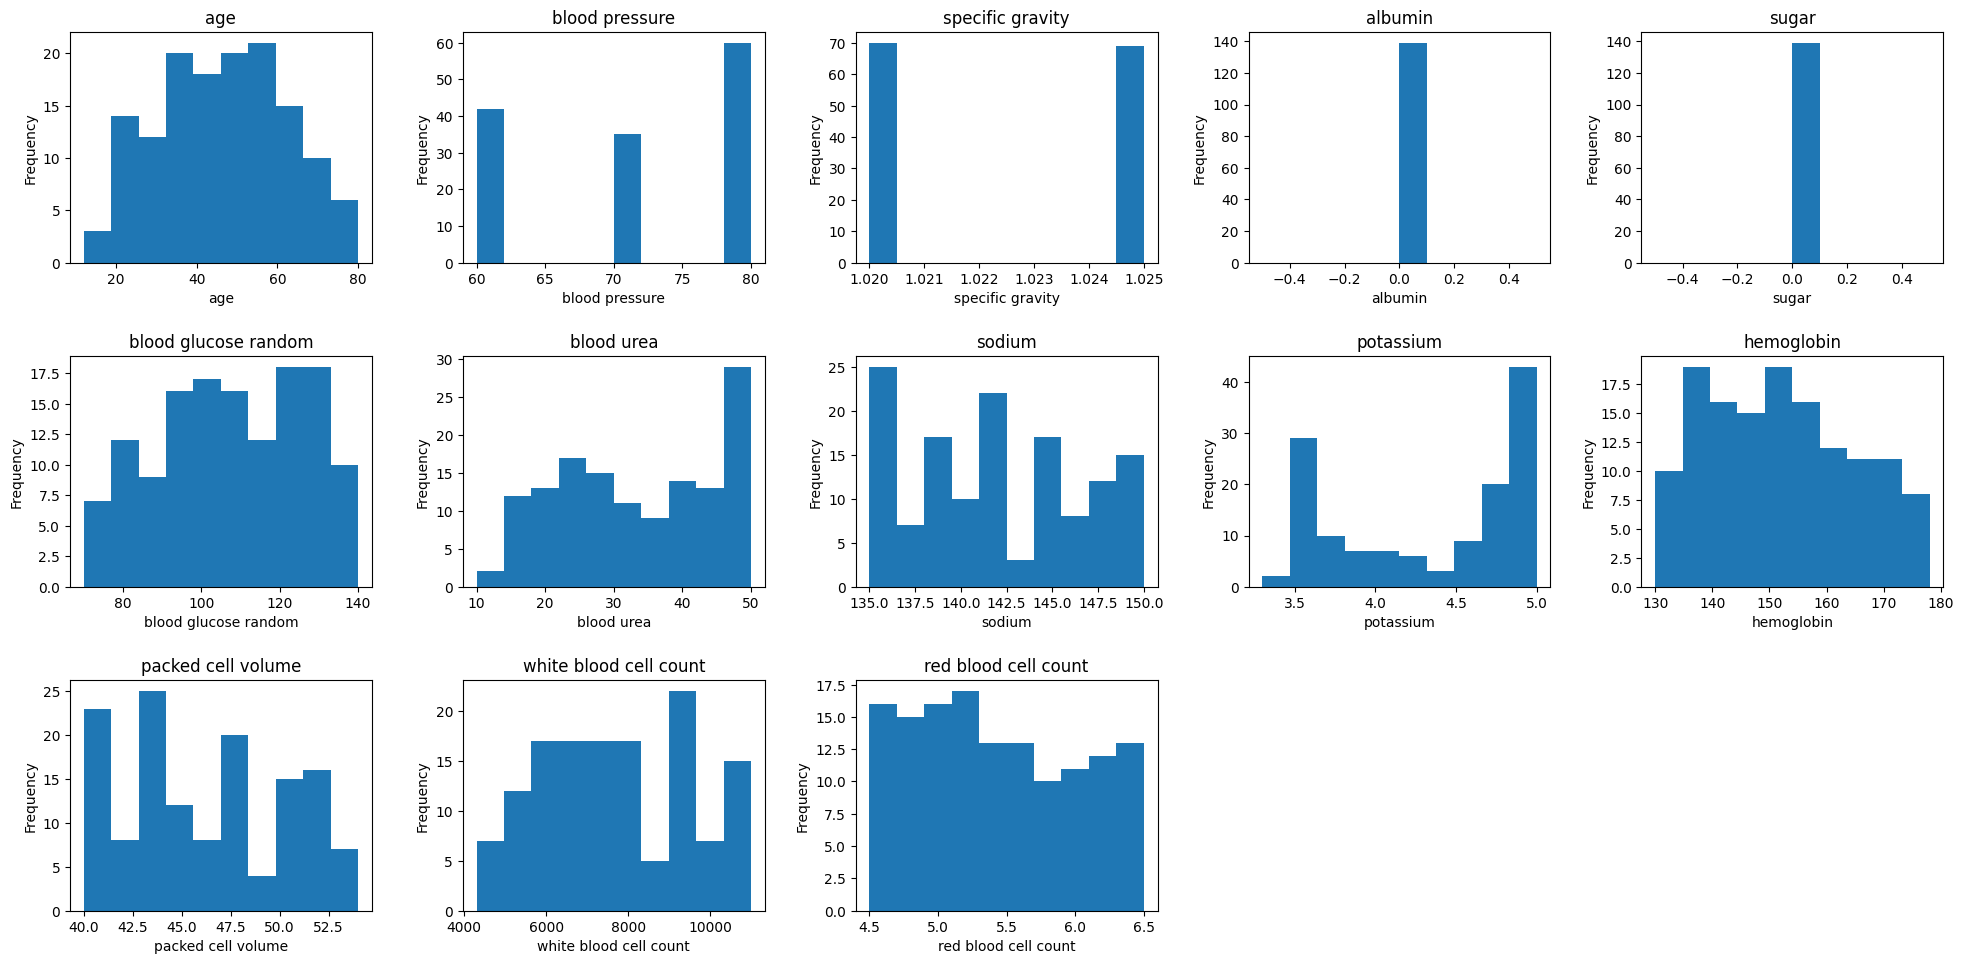

In [12]:
def plot_data(df):
    plt.figure(figsize=(20,10))
    for i, col in enumerate(df.select_dtypes(include=[float])):
        plt.subplot(3,5, i+1)
        df[col].plot(kind="hist", title=col)
        plt.xlabel(col)
    plt.tight_layout(pad=2.0)

plot_data(not_affected)

### Histogram of ``affected`` individuals

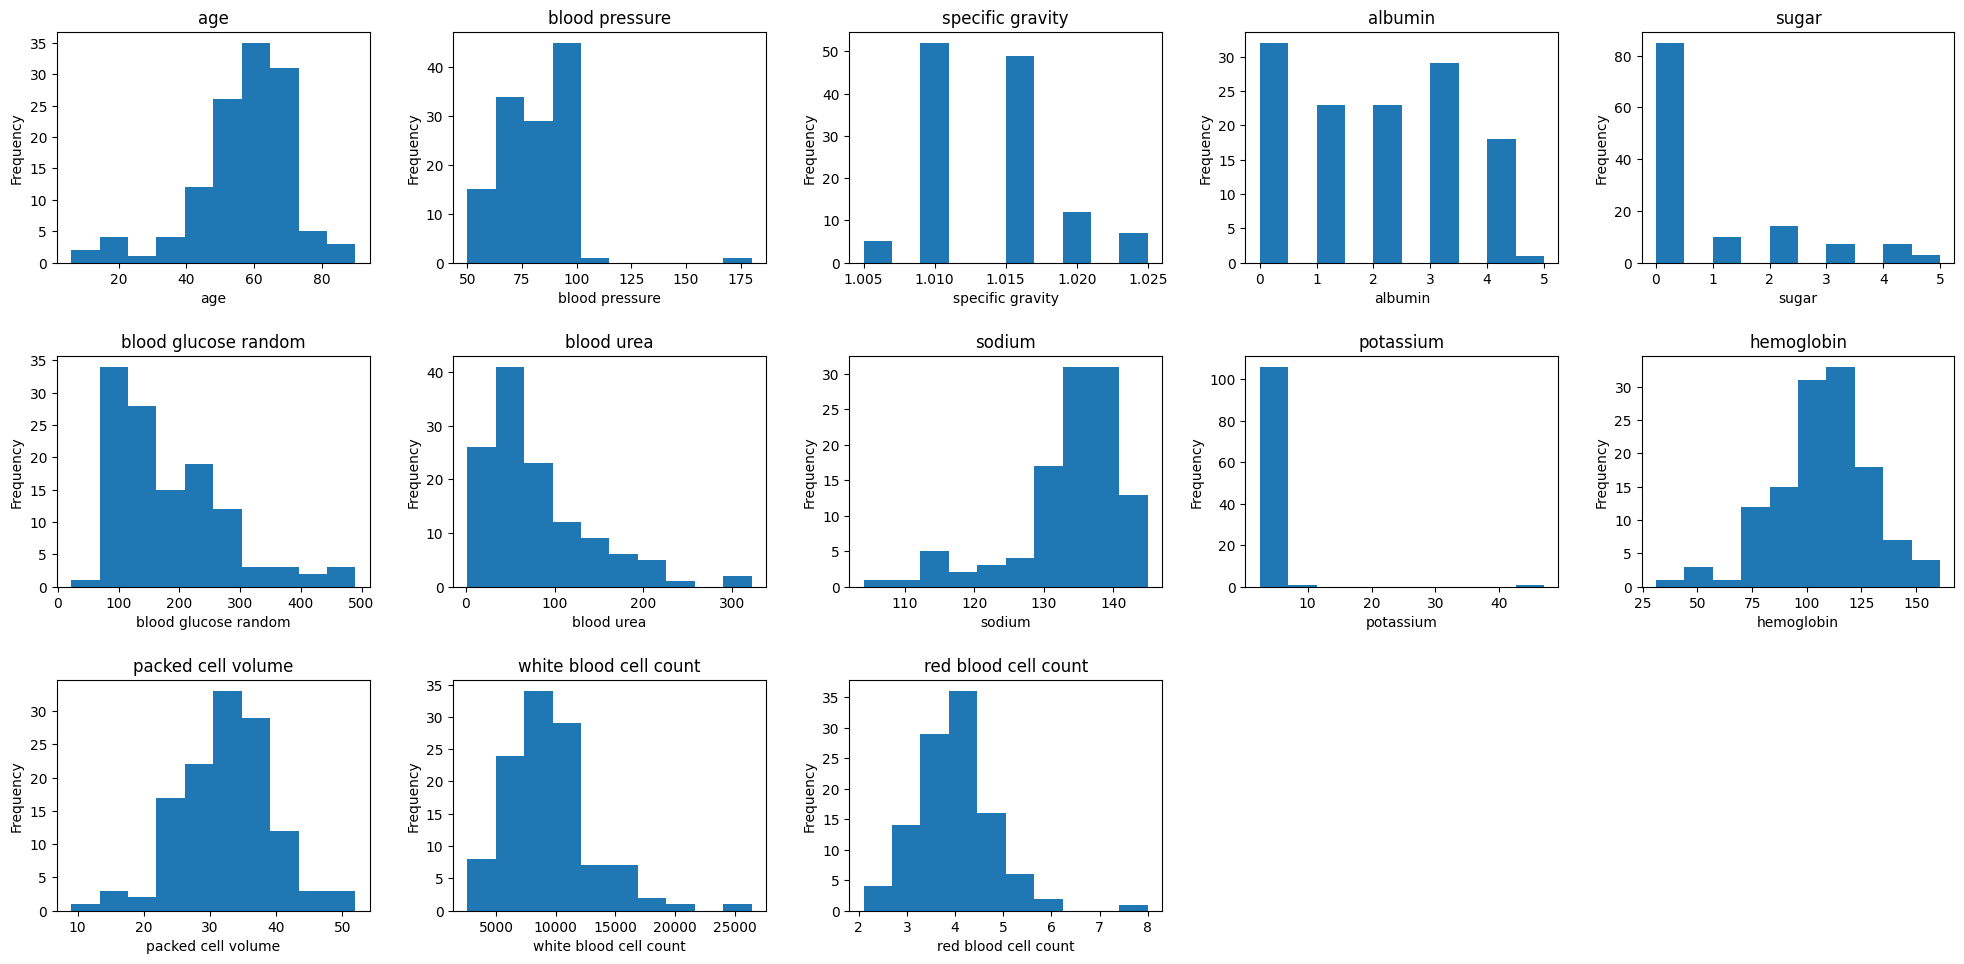

In [13]:
plot_data(affected)

### Correlation tables of the ``not affected`` and ``affected``

In [14]:
not_affected.drop(columns=['albumin', 'sugar'], inplace=True, errors='ignore')
not_affected.corr()

,age,blood pressure,specific gravity,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,-0.071093,-0.092814,0.101408,0.078620,0.110581,-0.094361,0.056334,-0.009969,0.128762,-0.045118
blood pressure,-0.071093,1.000000,0.084470,0.004094,-0.084057,-0.107489,-0.064606,0.157748,-0.007854,-0.098981,-0.030603
specific gravity,-0.092814,0.084470,1.000000,-0.038416,-0.050116,-0.033880,0.074253,0.026303,-0.007082,-0.028054,0.067207
blood glucose random,0.101408,0.004094,-0.038416,1.000000,-0.067850,-0.007900,0.146784,-0.147729,-0.257604,-0.069143,-0.196675
blood urea,0.078620,-0.084057,-0.050116,-0.067850,1.000000,0.005475,0.047313,0.085647,0.116931,0.041256,-0.010890
sodium,0.110581,-0.107489,-0.033880,-0.007900,0.005475,1.000000,0.065758,-0.011060,-0.001524,0.338373,-0.092615
potassium,-0.094361,-0.064606,0.074253,0.146784,0.047313,0.065758,1.000000,0.099223,-0.168690,0.041307,-0.052842
hemoglobin,0.056334,0.157748,0.026303,-0.147729,0.085647,-0.011060,0.099223,1.000000,0.057235,-0.191126,0.075912
packed cell volume,-0.009969,-0.007854,-0.007082,-0.257604,0.116931,-0.001524,-0.168690,0.057235,1.000000,-0.085214,0.042696
white blood cell count,0.128762,-0.098981,-0.028054,-0.069143,0.041256,0.338373,0.041307,-0.191126,-0.085214,1.000000,-0.050437


In [15]:
affected.corr()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.061731,-0.004869,-0.016726,0.138945,0.205133,0.022593,-0.033951,-0.007490,-0.006174,-0.044467,0.015848,-0.016616
blood pressure,0.061731,1.000000,0.066651,0.022210,0.181615,0.041162,0.064547,0.148208,0.068721,-0.097107,-0.104029,-0.040061,0.095163
specific gravity,-0.004869,0.066651,1.000000,-0.061509,-0.044993,-0.083967,-0.037977,0.143235,0.046375,0.114042,0.106808,-0.026688,0.120779
albumin,-0.016726,0.022210,-0.061509,1.000000,0.115618,0.099096,0.426974,-0.179331,0.176842,-0.371257,-0.329337,0.067898,-0.231920
sugar,0.138945,0.181615,-0.044993,0.115618,1.000000,0.692159,-0.053597,0.052022,0.152143,0.184927,0.120275,0.103631,0.091519
blood glucose random,0.205133,0.041162,-0.083967,0.099096,0.692159,1.000000,-0.029130,-0.053968,0.019949,0.144666,0.097501,0.049505,0.140348
blood urea,0.022593,0.064547,-0.037977,0.426974,-0.053597,-0.029130,1.000000,-0.320019,0.197928,-0.608652,-0.568745,-0.135999,-0.487755
sodium,-0.033951,0.148208,0.143235,-0.179331,0.052022,-0.053968,-0.320019,1.000000,0.002814,0.295139,0.317933,0.019716,0.266934
potassium,-0.007490,0.068721,0.046375,0.176842,0.152143,0.019949,0.197928,0.002814,1.000000,-0.181083,-0.198267,-0.169084,-0.185432
hemoglobin,-0.006174,-0.097107,0.114042,-0.371257,0.184927,0.144666,-0.608652,0.295139,-0.181083,1.000000,0.951500,0.071613,0.779202


---

### Function to draw heatmaps of the correlations

In [16]:
def plot_heatmap(df):
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(corr, cmap="coolwarm", interpolation="none")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.show()

#### Draw the heatmap of the ``not affected`` individuals.

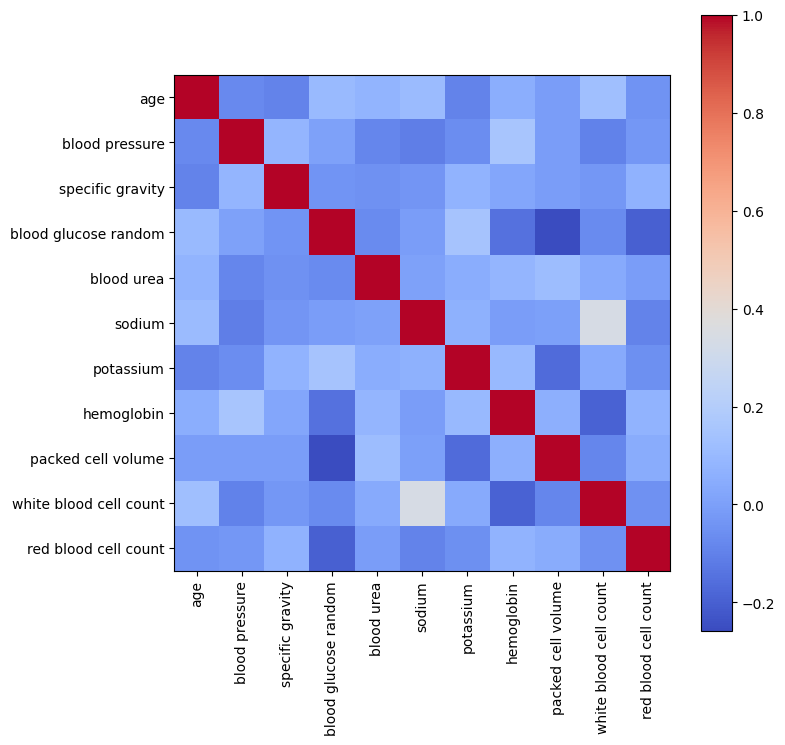

In [17]:
plot_heatmap(not_affected)

#### Draw the heatmap of the ``affected`` individuals.

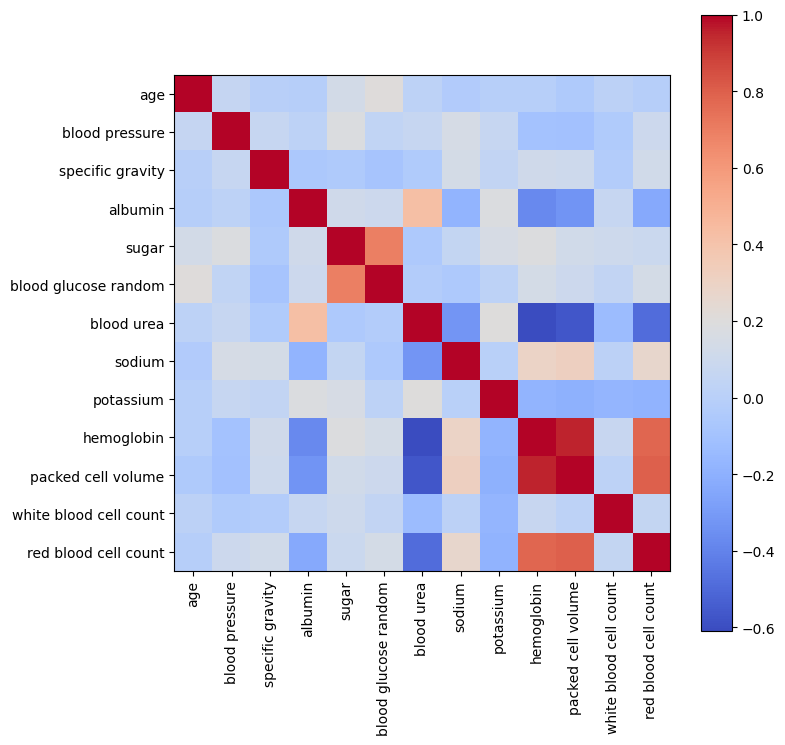

In [18]:
plot_heatmap(affected)